# Ile modeli zalicza się do zbioru Rashomon w zależności od punktu odcięcia?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
results = np.load('results.npy', allow_pickle=True)

In [3]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_lambda,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.638575,0.536402,0.043196,0.012438,0.810526,730,2.151381,15,0.004202,26.664384,...,0.835130,0.008858,17,0.875231,0.870416,0.874698,0.873335,0.874948,0.873725,0.001778
1,4.878420,0.328184,0.013987,0.000234,0.289474,280,27.655101,7,0.077793,0.694326,...,0.859300,0.008040,5,0.920223,0.919929,0.921731,0.921778,0.921052,0.920943,0.000758
2,14.659953,0.737244,0.023060,0.005427,0.668421,680,76.806574,4,0.482088,6.197039,...,0.830569,0.007944,21,0.994952,0.993956,0.994870,0.995095,0.994692,0.994713,0.000400
3,16.158682,0.743277,0.031358,0.001582,0.431579,730,21.422466,10,0.006052,114.730508,...,0.817475,0.008329,29,0.835430,0.830444,0.834490,0.833089,0.834878,0.833666,0.001788
4,0.706625,0.022456,0.010400,0.000107,0.147368,180,99.152617,13,0.008716,0.01808,...,0.787429,0.013471,41,0.791654,0.789798,0.794565,0.795891,0.797201,0.793822,0.002725


In [4]:
mean_test_score = results.mean_test_score

In [5]:
print(f"Najlepszy model osiagnął wynik : {np.max(mean_test_score)}")
print(f"Najgorszy model osiagnął wynik : {np.min(mean_test_score)}")

Najlepszy model osiagnął wynik : 0.8630322161401633
Najgorszy model osiagnął wynik : 0.6828884290166908


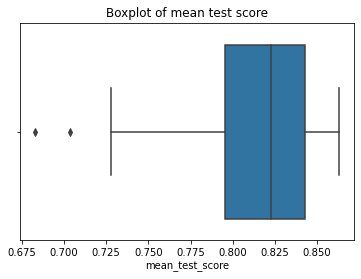

In [6]:
sns.boxplot(x = mean_test_score)
plt.title('Boxplot of mean test score')
plt.show()

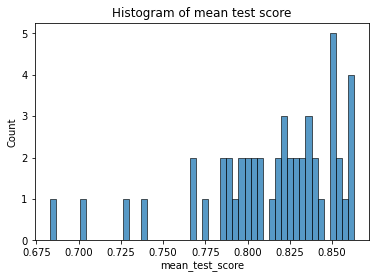

In [7]:
sns.histplot(mean_test_score, bins = 50)
plt.title('Histogram of mean test score')
plt.show()

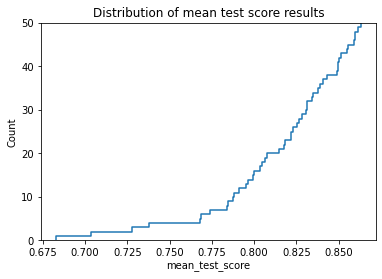

In [8]:
sns.ecdfplot(mean_test_score, stat="count")
plt.title('Distribution of mean test score results')
plt.show()

### Rashomon ratio w zależności od punktu odcięcia

In [9]:
counts, bins = np.histogram(mean_test_score, bins=50, range=(0.5, 1))

In [10]:
reverse_cum_sum = np.cumsum(counts[::-1])[::-1] 

In [11]:
ratio = reverse_cum_sum / len(reverse_cum_sum)
ratio = np.append(ratio, 0)

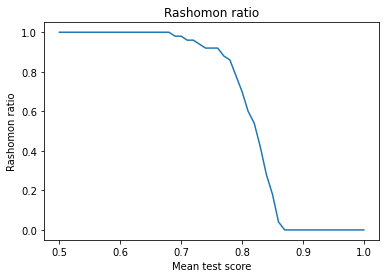

In [12]:
sns.lineplot(x = bins, y = ratio)
plt.title('Rashomon ratio')
plt.xlabel('Mean test score')
plt.ylabel('Rashomon ratio')
plt.show()